In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
import cv2
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder
from IPython.core import display as ICD

plt.style.use("seaborn")

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys, os
script_dir = sys.path[0]
print(script_dir)

C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project


In [3]:
#Constant zone
IMG_PATH_TRAIN = os.path.join(script_dir+r'\train')
IMG_PATH_TEST = os.path.join(script_dir+r'\test1')
IMG_PATH_TRAIN_MOD = os.path.join(script_dir+r'\train_modified')
IMG_PATH_TEST_MOD = os.path.join(script_dir+r'\test_modified')
print("Train path:",IMG_PATH_TRAIN+"\n")
print("Test path:",IMG_PATH_TEST+"\n")
print("Modified train path:",IMG_PATH_TRAIN_MOD+"\n")
print("Modified test path:",IMG_PATH_TEST_MOD)

MODIFIED_WIDTH = 100
MODIFIED_HEIGHT = 100

COLOR = 'white'
#FONT = 'Adobe'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['figure.facecolor'] = 'black'

plt.rc('axes', titlesize=25) #fontsize of the title
plt.rc('axes', labelsize=19) #fontsize of the x and y labels
plt.rc('xtick', labelsize=19) #fontsize of the x tick labels
plt.rc('ytick', labelsize=19) #fontsize of the y tick labels
#plt.rcParams['font.family'] = FONT

Train path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\train

Test path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\test1

Modified train path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\train_modified

Modified test path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\test_modified


In [4]:
#Function zone

def modify_img(image, new_width, new_height): #Modifies an image according to chosen parameters
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    modified_img = cv2.resize(gray_img, (new_width, new_height))
    return modified_img

def read_img(picture_path, filename): #Reads file from path
    return cv2.imread(picture_path+"/"+filename, -1)

def write_img(destination_path, filename, image): #Writes new file to given path
    cv2.imwrite(destination_path+"/"+filename, image)
     
def modify_train(): #Modifies the train data and writes it to the appropriate directory
    count = 0
    for f in os.listdir(IMG_PATH_TRAIN):
        img = read_img(picture_path = IMG_PATH_TRAIN, filename = f)
        mod_img = modify_img(img, new_width = MODIFIED_WIDTH, new_height = MODIFIED_HEIGHT)
        write_img(destination_path = IMG_PATH_TRAIN_MOD, filename = f, image = mod_img)
        msg = "Modified {0}% of training data".format(int(count/250))
        print(msg)
        clear_output(wait=True)
        count += 1

    print("Train data modification complete")
    
def modify_test(): #Modifies the test data and writes it to the appropriate directory
    count = 0
    for f in os.listdir(IMG_PATH_TEST):
        img = read_img(picture_path = IMG_PATH_TEST, filename = f)
        mod_img = modify_img(img, new_width = MODIFIED_WIDTH, new_height = MODIFIED_HEIGHT)
        write_img(destination_path = IMG_PATH_TEST_MOD, filename = f, image = mod_img)
        msg = "Modified {0}% of testing data".format(int(count/250))
        print(msg)
        clear_output(wait=True)
        count += 1

    print("Test data modification complete")
      
@jit(nogil = True)
def images_to_df_train(): #Returns dataframe of the train files
    train_array = np.ndarray(shape = (0,MODIFIED_WIDTH,MODIFIED_HEIGHT), dtype= 'uint8')
    label_names = []
    count = 0
    for f in os.listdir(IMG_PATH_TRAIN_MOD):
        img = read_img(picture_path = IMG_PATH_TRAIN_MOD, filename = f)
        train_array = np.insert(train_array, count , img.reshape((1,MODIFIED_WIDTH,MODIFIED_HEIGHT)), axis = 0)
        label_names.append(f.split('.')[0])
        msg = "Loaded {0} images. {1}%".format(count, count/250)
        print(msg)

        clear_output(wait=True)
        count += 1
    print("Data loading complete")
    
    train_df = pd.DataFrame(data = train_array.reshape(25000, MODIFIED_WIDTH*MODIFIED_HEIGHT))
    label_df = pd.DataFrame(data = label_names, columns = ['label'])
    label_df.insert(loc=0, column='Label', value=LabelEncoder().fit_transform(label_df['label']))
    label_df = label_df.drop(columns = ['label'])
    train_final = pd.concat([train_df, label_df], axis = 1)
    print("Train dataframe loading complete")
    return train_final

@jit(nogil = True)
def images_to_df_test(): #Returns dataframe of the test files
    test_array = np.ndarray(shape = (0,MODIFIED_WIDTH,MODIFIED_HEIGHT), dtype= 'uint8')
    count = 0
    for f in os.listdir(IMG_PATH_TEST_MOD):
        img = read_img(picture_path = IMG_PATH_TEST_MOD, filename = f)
        test_array = np.insert(test_array, count , img.reshape((1,MODIFIED_WIDTH,MODIFIED_HEIGHT)), axis = 0)
        msg = "Loaded {0} images. {1}%".format(count, count/125)
        print(msg)

        clear_output(wait=True)
        count += 1
    print("Data loading complete")
    test_df = pd.DataFrame(data = test_array.reshape(12500, MODIFIED_WIDTH*MODIFIED_HEIGHT))
    print("Test dataframe loading complete")
    return test_df

In [5]:
# colored_img = cv2.imread(IMG_PATH_TRAIN+"/"+"cat.0.jpg")
# gray_img = cv2.cvtColor(colored_img, cv2.COLOR_BGR2GRAY)
# modified_img = cv2.resize(gray_img,(150,150))

In [6]:
# cv2.imshow('Original', colored_img)
# cv2.imshow('Modified', modified_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
#plt.imshow(Image.open(img_path))

In [8]:
#img = cv2.imread(img_path)
#resize_img = cv2.resize(img,(600,600))

In [9]:
#cv2.imshow('Original', img) 
#cv2.imshow('Resizing', resize_img) 
#cv2.waitKey(0) 
#cv2.destroyAllWindows()

In [10]:
#import matplotlib.image as mpimg

In [11]:
#plt.imshow(cv2.resize(img,(500,500)))

In [12]:

# @jit(nogil = True)
# def labels():
#     count = 0
#     labels = []
#     for f in os.listdir(IMG_PATH_TRAIN):
#         img = read_img(picture_path = IMG_PATH_TRAIN, filename = f)
#         labels.append(f.split('.')[0])
#         msg = "Loaded {0} labels".format(count)
#         print(msg)
#         clear_output(wait=True)
#         count += 1
#     df = pd.DataFrame(data = labels, columns= ['label'])
#     return df
    

# df = labels()
# df

In [13]:
# from IPython.display import clear_output
# data = pd.DataFrame()
# row = []
# count = 0
# for f in os.listdir(IMG_PATH_TRAIN_MOD):
#     print("Loading...", str(int(count/250)) + "%")
#     img = cv2.imread(IMG_PATH_TRAIN_MOD+"/"+f, 0)
#     data = data.append(pd.Series(img.reshape(img.size)), ignore_index=True)
    
#     clear_output(wait=True)
#     count += 1
    
#     if(count >= 1000):
#         break

In [5]:
%%time
modify_train()

Train data modification complete
Wall time: 1min 38s


In [15]:
# %%time
# modify_test()


In [6]:
%%time
train_df = images_to_df_train()

Data loading complete
Train dataframe loading complete
Wall time: 11min 27s


In [6]:
# %%time
# test_df = images_to_df_test()

Data loading complete
Test dataframe loading complete
Wall time: 7min 1s


In [7]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Label
0,168,173,178,181,185,188,190,193,196,198,...,3,3,2,2,2,2,2,2,2,0
1,44,43,43,42,52,32,53,38,41,60,...,51,49,50,55,61,62,90,18,34,0
2,38,27,42,50,46,56,59,55,54,58,...,160,148,135,132,148,159,168,171,153,0
3,220,224,223,227,229,223,225,234,229,226,...,212,205,204,202,214,222,215,212,213,0
4,118,117,123,91,82,95,132,131,149,179,...,95,96,91,102,121,96,89,92,81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,142,143,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,116,78,104,85,97,115,71,83,86,88,...,94,79,99,87,77,85,94,92,76,1
24997,42,35,47,56,66,48,48,57,60,38,...,133,136,126,72,112,181,128,114,167,1
24998,254,250,246,235,224,208,187,144,113,74,...,103,104,113,111,112,106,118,115,119,1


In [8]:
# test_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,63,59,52,63,66,66,67,64,57,60,...,151,214,210,191,116,134,149,172,176,79
1,10,6,9,11,2,7,105,98,86,85,...,103,77,76,81,80,66,67,71,65,77
2,4,3,3,3,2,2,3,4,4,6,...,248,248,246,244,250,250,251,249,237,253
3,132,135,193,155,198,219,153,175,185,193,...,158,172,165,177,140,126,154,193,160,125
4,124,134,108,190,217,222,223,190,216,219,...,147,137,116,137,158,159,152,119,135,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,36,42,47,50,53,55,57,59,66,70,...,137,138,125,137,135,119,129,126,119,117
12496,142,145,50,204,124,143,144,92,193,102,...,28,36,12,54,31,21,11,17,31,30
12497,215,211,231,233,209,241,208,235,228,202,...,154,155,151,157,139,122,105,129,119,117
12498,108,108,119,137,143,149,155,170,174,178,...,126,129,133,130,125,122,121,119,121,122


In [8]:
print("Null count in the train dataframe:",train_df.isnull().sum().sum())
#print("Null count in the test dataframe:",test_df.isnull().sum().sum())

Null count in the train dataframe: 0


## Models without unsupervised preprocessing

### Dummy model

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1:]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify = y)
print("Train shape:",X_train.shape)
print("Test shape:",y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print("Test class counts:",dict(zip(unique, counts)))

Train shape: (22500, 10000)
Test shape: (2500, 1)
Test class counts: {0: 1250, 1: 1250}


In [12]:
from sklearn.dummy import DummyClassifier
dum = DummyClassifier(strategy="uniform")
dum.fit(X_train, y_train)
print("Dummy model train score:",dum.score(X_train, y_train))
print("Dummy model test score:",dum.score(X_test, y_test))

Dummy model train score: 0.5061333333333333
Dummy model test score: 0.4976


### Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split

In [9]:
# X = train_df.iloc[:,:-1]
# y = train_df.iloc[:,-1:]

In [10]:
# X

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,168,173,178,181,185,188,190,193,196,198,...,3,3,3,2,2,2,2,2,2,2
1,44,43,43,42,52,32,53,38,41,60,...,47,51,49,50,55,61,62,90,18,34
2,38,27,42,50,46,56,59,55,54,58,...,157,160,148,135,132,148,159,168,171,153
3,220,224,223,227,229,223,225,234,229,226,...,228,212,205,204,202,214,222,215,212,213
4,118,117,123,91,82,95,132,131,149,179,...,95,95,96,91,102,121,96,89,92,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,142,143,145,146,147,148,149,148,149,...,164,165,166,166,167,168,168,168,168,169
24996,116,78,104,85,97,115,71,83,86,88,...,95,94,79,99,87,77,85,94,92,76
24997,42,35,47,56,66,48,48,57,60,38,...,101,133,136,126,72,112,181,128,114,167
24998,254,250,246,235,224,208,187,144,113,74,...,119,103,104,113,111,112,106,118,115,119


In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
# print("Train shape:",X_train.shape)
# print("Test shape:",y_train.shape)

Train shape: (22500, 10000)
Test shape: (22500, 1)


In [14]:
logistic_model = LogisticRegression(penalty = 'elasticnet',
                                    tol = 0.01, 
                                    solver = 'saga', 
                                    n_jobs = os.cpu_count() - 1, 
                                    C = 0.1, 
                                    class_weight = 'balanced', 
                                    multi_class = 'ovr', 
                                    l1_ratio = 0.5, 
                                    random_state=42)
logistic_model.fit(X_train, y_train.values.ravel())

LogisticRegression(C=0.1, class_weight='balanced', l1_ratio=0.5,
                   multi_class='ovr', n_jobs=11, penalty='elasticnet',
                   random_state=42, solver='saga', tol=0.01)

In [15]:
print("Classes known to the model:",logistic_model.classes_)
print("Logistic baseline score(train):",logistic_model.score(X_train, y_train))
print("Logistic baseline score(test):",logistic_model.score(X_test, y_test))

Classes known to the model: [0 1]
Logistic baseline score(train): 0.7192
Logistic baseline score(test): 0.5428


### Naive Bayes

In [16]:
from sklearn.naive_bayes import CategoricalNB

In [17]:
naive_bayes_model = CategoricalNB(alpha = 0.4).fit(X_train, y_train.values.ravel())

In [18]:
print("Class count:",naive_bayes_model.class_count_)
print("Classes known to the model:",naive_bayes_model.classes_)
print("Naive bayes baseline score:",naive_bayes_model.score(X_train, y_train))
print("Naive bayes baseline score:",naive_bayes_model.score(X_test, y_test))

Class count: [11250. 11250.]
Classes known to the model: [0 1]
Naive bayes baseline score: 0.7320888888888889
Naive bayes baseline score: 0.5604


### Random forest and pixel importance

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
forest = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs = os.cpu_count() - 1, max_depth=3)
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=3, n_estimators=200, n_jobs=11,
                       random_state=42)

In [21]:
print("Random forest baseline train score:",forest.score(X_train, y_train))
print("Random forest baseline test score:",forest.score(X_test, y_test))
#cv_scores = cross_val_score(forest, X_train, y_train, cv=3)
#print(cv_scores)
#print("cv_scores mean: " + str(np.mean(cv_scores)))

Random forest baseline train score: 0.6012
Random forest baseline test score: 0.5652


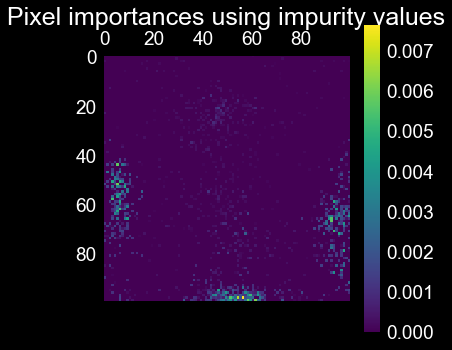

In [22]:
importances = forest.feature_importances_
imp_reshaped = importances.reshape((MODIFIED_WIDTH, MODIFIED_HEIGHT))
plt.matshow(imp_reshaped, cmap=plt.cm.viridis)
plt.grid(False)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

### Gradient boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
Gradient_classifier = GradientBoostingClassifier(max_features = None,random_state = 42, verbose = 1, warm_start = True, n_iter_no_change = 10, tol = 0.5)
Gradient_classifier.fit(X_train, y_train.values.ravel())

      Iter       Train Loss   Remaining Time 
         1           1.3797           86.43m
         2           1.3736           84.64m
         3           1.3683           83.11m
         4           1.3630           82.00m
         5           1.3582           80.94m
         6           1.3530           80.33m
         7           1.3485           79.61m
         8           1.3441           78.74m
         9           1.3406           78.05m
        10           1.3370           77.18m


GradientBoostingClassifier(n_iter_no_change=10, random_state=42, tol=0.5,
                           verbose=1, warm_start=True)

In [25]:
print("Number of clases known to model:",Gradient_classifier.classes_)
print("Gradient classifier baseline training score:",Gradient_classifier.score(X_train, y_train))
print("Gradient classifier baseline test score:",Gradient_classifier.score(X_test, y_test))

Number of clases known to model: [0 1]
Gradient classifier baseline training score: 0.6250222222222223
Gradient classifier baseline test score: 0.5716


## Apply PCA on the data

In [28]:
PCA_data = train_df.iloc[:,:-1]
PCA_data.shape[1]

10000

In [31]:
from sklearn.decomposition import PCA

In [36]:
pca_model = PCA(n_components=10000,svd_solver = 'randomized', random_state = 42)
pca_model.fit(PCA_data)

PCA(n_components=10000, random_state=42, svd_solver='randomized')

Text(0, 0.5, 'Explained variance')

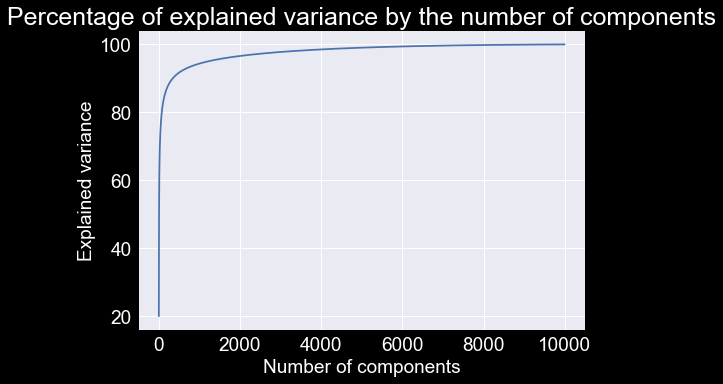

In [37]:
plt.grid(True)
plt.plot(np.cumsum(pca_model.explained_variance_ratio_ * 100))
plt.title("Percentage of explained variance by the number of components")
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

## Grid-search on models

In [19]:
from sklearn.model_selection import GridSearchCV

In [109]:
def plot_grid_results(model_checked, grid_model): #Plots grid-search score results from best to worst
    grid_data = pd.DataFrame(grid_model.cv_results_)
    params = []
    for param in grid_model.best_params_:
        params.append("param_"+param)
    params.append('mean_test_score')
    
    grid_frame_mod = grid_data.loc[:,params]
    grid_frame_mod = grid_frame_mod.fillna(value = "None") ##Replace None with 'None' strings for plotability.
    grp = grid_frame_mod.groupby(by = params[:-1]).agg(lambda x: x).mean_test_score.nlargest(n = grid_data.shape[0])
    min_value = grid_data['mean_test_score'].min()
    max_value = grid_data['mean_test_score'].max()
    
    
    ICD.display(grid_data)#Display the results data-frame
    plt.figure(facecolor='black') 
    grp.plot(kind = "bar", figsize = (24, 8), color = "Blue")
    ax = plt.axes()
    ax.set_facecolor("black")
    plt.ylabel("Score")
    plt.title("Gridsearch results sorted from highest to lowest({0})".format(model_checked))
    ax.set_ylim([(min_value - 0.001) ,max_value])
    plt.show()
    msg = "Best {0} model: {1} with an accuracy of {2}".format(model_checked, grid_model.best_params_, grid_model.best_score_)
    print(msg)

### Logistic-regression

In [21]:
LOG = LogisticRegression(tol = 0.01, random_state=42, n_jobs = os.cpu_count() - 1)
parameters = {"solver": ['sag', 'saga']}
LOG_grid = GridSearchCV(LOG, parameters, cv = 3 ,verbose = 4).fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ........................solver=sag;, score=0.528 total time= 2.4min
[CV 2/3] END ........................solver=sag;, score=0.524 total time= 1.8min
[CV 3/3] END ........................solver=sag;, score=0.545 total time= 1.5min
[CV 1/3] END .......................solver=saga;, score=0.533 total time= 2.9min
[CV 2/3] END .......................solver=saga;, score=0.529 total time= 2.0min
[CV 3/3] END .......................solver=saga;, score=0.550 total time= 1.8min


In [26]:
#pd.DataFrame(LOG_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,113.224324,22.349419,0.605217,0.027597,sag,{'solver': 'sag'},0.5276,0.524400,0.544667,0.532222,0.008896,2
1,133.310257,27.646619,0.586844,0.028284,saga,{'solver': 'saga'},0.5328,0.528533,0.550000,0.537111,0.009279,1


['param_solver', 'mean_test_score']
param_solver
saga    0.537111
sag     0.532222
Name: mean_test_score, dtype: float64


<ipython-input-93-365c802c397d>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


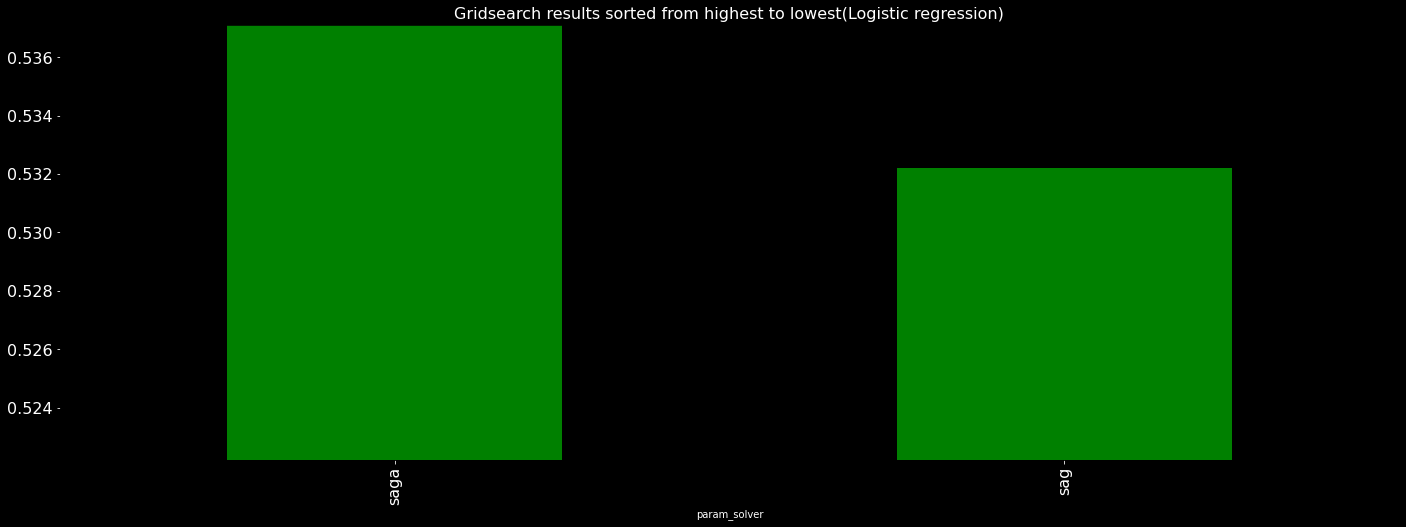

Best Logistic regression model: {'solver': 'saga'} with an accuracy of 0.5371111111111111


In [94]:
plot_grid_results("Logistic regression", LOG_grid)

### Naive bayes

In [115]:
BAYES = CategoricalNB()
parameters = {"alpha": np.arange(0.2,1.6,0.2)}
BAYES_grid = GridSearchCV(BAYES, parameters, cv = 3 ,verbose = 4).fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END .........................alpha=0.2;, score=0.585 total time=   8.6s
[CV 2/3] END .........................alpha=0.2;, score=0.578 total time=   8.7s
[CV 3/3] END .........................alpha=0.2;, score=0.577 total time=   8.6s
[CV 1/3] END .........................alpha=0.4;, score=0.585 total time=   9.0s
[CV 2/3] END .........................alpha=0.4;, score=0.579 total time=   9.0s
[CV 3/3] END .........................alpha=0.4;, score=0.577 total time=   8.8s
[CV 1/3] END .........................alpha=0.6;, score=0.584 total time=   8.9s
[CV 2/3] END .........................alpha=0.6;, score=0.579 total time=   8.6s
[CV 3/3] END .........................alpha=0.6;, score=0.577 total time=   8.7s
[CV 1/3] END .........................alpha=0.8;, score=0.584 total time=   8.5s
[CV 2/3] END .........................alpha=0.8;, score=0.578 total time=   8.7s
[CV 3/3] END .........................alpha=0.8;,

<ipython-input-109-4f0d3242a55f>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


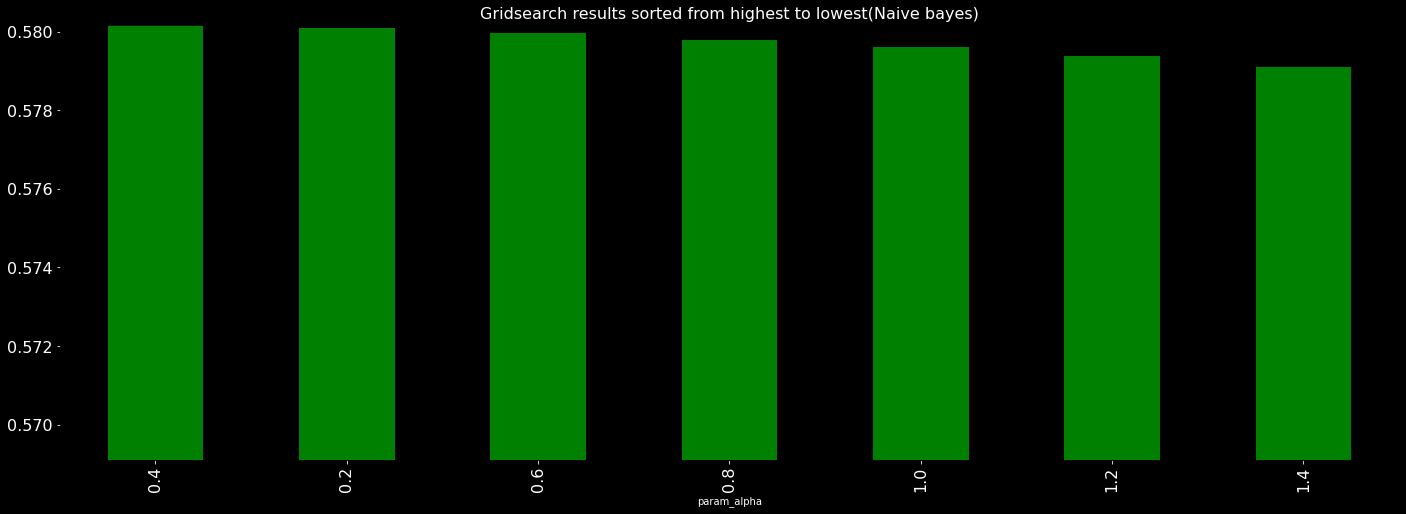

Best Naive bayes model: {'alpha': 0.4} with an accuracy of 0.5801777777777778


In [116]:
plot_grid_results("Naive bayes", BAYES_grid)

### Random forest

In [119]:
FOREST = RandomForestClassifier(random_state=42, n_jobs = os.cpu_count() - 1)
parameters = {"criterion": ["gini", "entropy"],
              "max_features": ["sqrt", "log2"]}
FOREST_grid = GridSearchCV(FOREST, parameters, cv = 3 ,verbose = 4).fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ...................n_estimators=50;, score=0.626 total time=  22.2s
[CV 2/3] END ...................n_estimators=50;, score=0.623 total time=  21.8s
[CV 3/3] END ...................n_estimators=50;, score=0.624 total time=  23.8s
[CV 1/3] END ..................n_estimators=100;, score=0.639 total time=  38.7s
[CV 2/3] END ..................n_estimators=100;, score=0.635 total time=  38.8s
[CV 3/3] END ..................n_estimators=100;, score=0.644 total time=  38.2s
[CV 1/3] END ..................n_estimators=150;, score=0.644 total time=  54.2s
[CV 2/3] END ..................n_estimators=150;, score=0.636 total time=  54.2s
[CV 3/3] END ..................n_estimators=150;, score=0.643 total time=  54.9s


<ipython-input-109-4f0d3242a55f>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


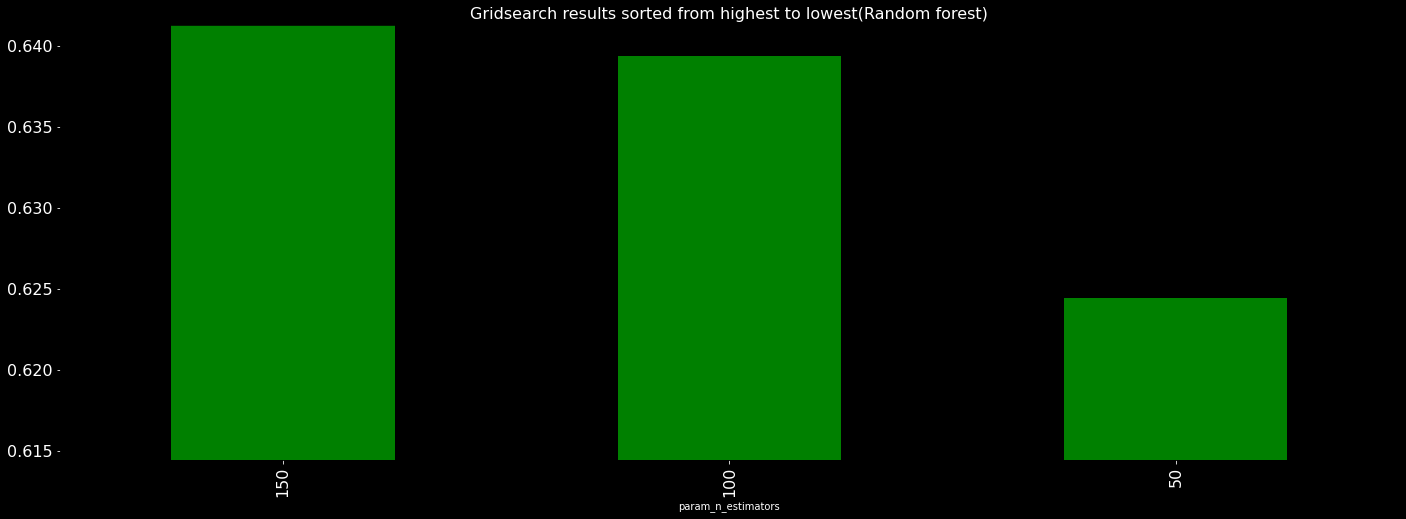

Best Random forest model: {'n_estimators': 150} with an accuracy of 0.6412888888888889


In [120]:
plot_grid_results("Random forest", FOREST_grid)

## MiniBatchK-Means with both Logistic regression and Naive Bayes

In [121]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.pipeline import Pipeline

In [122]:
pipeline_log = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=10,random_state=42, batch_size=3072)),
 ("log_reg", LogisticRegression(tol = 0.01, solver = 'saga', random_state=42, n_jobs = os.cpu_count() - 1)),
], verbose = True)
pipeline_log.fit(X_train, y_train.values.ravel())

[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=  31.8s
[Pipeline] ........... (step 2 of 2) Processing log_reg, total=   0.2s


Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=10,
                                 random_state=42)),
                ('log_reg',
                 LogisticRegression(n_jobs=7, random_state=42, solver='saga',
                                    tol=0.01))],
         verbose=True)

In [123]:
print("Pipeline score when using minibatchKmeans on Logistic regression:",pipeline_log.score(X_test, y_test))

Pipeline score when using minibatchKmeans on Logistic regression: 0.562


In [124]:
pipeline_bayes = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=10,random_state=42, batch_size=3072)),
 ("naive_bayes", CategoricalNB()),
], verbose = True)
pipeline_bayes.fit(X_train, y_train.values.ravel())

[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=  28.0s
[Pipeline] ....... (step 2 of 2) Processing naive_bayes, total=   0.1s


Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=10,
                                 random_state=42)),
                ('naive_bayes', CategoricalNB())],
         verbose=True)

In [125]:
print("Pipeline score when using minibatchKmeans on naive bayes:",pipeline_bayes.score(X_test, y_test))

IndexError: index 18474 is out of bounds for axis 1 with size 18465

In [126]:
pipeline_bayes = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=10,random_state=42, batch_size=3072)),
 ("random_forest", RandomForestClassifier(n_estimators = 100,random_state=42, n_jobs = os.cpu_count() - 1)),
], verbose = True)
pipeline_bayes.fit(X_train, y_train.values.ravel())

[Pipeline] ... (step 1 of 2) Processing minibatchKmeans, total=  26.4s
[Pipeline] ..... (step 2 of 2) Processing random_forest, total=   2.8s


Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=10,
                                 random_state=42)),
                ('random_forest',
                 RandomForestClassifier(n_jobs=7, random_state=42))],
         verbose=True)

In [127]:
print("Pipeline score when using minibatchKmeans on random forest:",pipeline_bayes.score(X_test, y_test))

Pipeline score when using minibatchKmeans on random forest: 0.5688


## Gridsearch for optimal K-clusters

In [45]:
# param_grid = {"minibatchKmeans__n_clusters":range(2, 102, 10)}
# grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=4).fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END .....minibatchKmeans__n_clusters=2;, score=0.527 total time=  15.6s
[CV 2/3] END .....minibatchKmeans__n_clusters=2;, score=0.526 total time=  13.9s
[CV 3/3] END .....minibatchKmeans__n_clusters=2;, score=0.512 total time=  17.7s
[CV 1/3] END ....minibatchKmeans__n_clusters=12;, score=0.576 total time=  22.6s
[CV 2/3] END ....minibatchKmeans__n_clusters=12;, score=0.582 total time=  22.1s
[CV 3/3] END ....minibatchKmeans__n_clusters=12;, score=0.574 total time=  25.1s
[CV 1/3] END ....minibatchKmeans__n_clusters=22;, score=0.589 total time=  32.5s
[CV 2/3] END ....minibatchKmeans__n_clusters=22;, score=0.580 total time=  30.8s
[CV 3/3] END ....minibatchKmeans__n_clusters=22;, score=0.575 total time=  32.3s
[CV 1/3] END ....minibatchKmeans__n_clusters=32;, score=0.587 total time=  39.9s
[CV 2/3] END ....minibatchKmeans__n_clusters=32;, score=0.586 total time=  39.4s
[CV 3/3] END ....minibatchKmeans__n_clusters=32;

In [46]:
# pd.DataFrame(grid_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_minibatchKmeans__n_clusters,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,14.243083,1.625439,1.574348,0.070665,2,{'minibatchKmeans__n_clusters': 2},0.526667,0.526267,0.512133,0.521689,0.006759,10
1,21.760257,1.340238,1.571628,0.010773,12,{'minibatchKmeans__n_clusters': 12},0.575867,0.581867,0.573733,0.577156,0.003443,9
2,30.266823,0.766828,1.710015,0.015748,22,{'minibatchKmeans__n_clusters': 22},0.588800,0.580000,0.574933,0.581244,0.005729,8
3,37.796140,0.446291,1.647454,0.075832,32,{'minibatchKmeans__n_clusters': 32},0.586800,0.585867,0.576133,0.582933,0.004823,7
4,53.716379,4.956299,1.691794,0.085216,42,{'minibatchKmeans__n_clusters': 42},0.589333,0.586800,0.582533,0.586222,0.002806,6
5,55.007676,5.504316,1.731729,0.096373,52,{'minibatchKmeans__n_clusters': 52},0.597867,0.588133,0.583067,0.589689,0.006141,5
6,59.640994,1.782167,1.819679,0.064726,62,{'minibatchKmeans__n_clusters': 62},0.595200,0.591333,0.592267,0.592933,0.001647,3
7,66.564672,5.594763,1.820013,0.060076,72,{'minibatchKmeans__n_clusters': 72},0.597067,0.588133,0.593200,0.592800,0.003658,4
8,84.358686,8.027694,1.795292,0.083802,82,{'minibatchKmeans__n_clusters': 82},0.597067,0.592400,0.589600,0.593022,0.003080,2
9,89.787482,5.884303,2.049178,0.107537,92,{'minibatchKmeans__n_clusters': 92},0.594533,0.592933,0.595333,0.594267,0.000998,1


In [49]:
# print("Best pipeline clusters using minibatchKmeans and logistic regression:\n", grid_clf.best_estimator_,"\nwith a score of:",grid_clf.best_score_)

Best pipeline clusters using minibatchKmeans and logistic regression:
 Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=92,
                                 random_state=42)),
                ('log_reg',
                 LogisticRegression(n_jobs=7, random_state=42, solver='saga',
                                    tol=0.01))]) 
with a score of: 0.5942666666666666
